 # ESTADISTICAS NUMERO DE LA LOTO

#### LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. READ DATA

In [2]:
data = pd.read_excel('base.xlsx', sheet_name='datos')
data.tail()

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2
307,2022-06-18,3,12,13,17,21,25,3,9
308,2022-06-22,11,13,21,33,34,36,2,11
309,2022-06-25,1,13,16,28,29,34,10,3
310,2022-06-29,7,9,16,25,32,35,5,15
311,2022-07-02,5,12,14,23,26,34,6,7


In [3]:
data.shape

(312, 9)

In [4]:
data.dtypes

Fecha       datetime64[ns]
bolo1                int64
bolo2                int64
bolo3                int64
bolo4                int64
bolo5                int64
bolo6                int64
Loto +.1             int64
Loto +.2             int64
dtype: object

## 2. DATA ENGINEERING
Aggregate columns: 
1. years
2. days names

In [5]:
data['year'] = data.Fecha.dt.year
data['day_name'] = data.Fecha.dt.day_name()

In [6]:
data.head()

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2,year,day_name
0,2019-04-10,12,15,18,23,25,31,4,1,2019,Wednesday
1,2019-04-13,7,9,10,21,27,28,5,5,2019,Saturday
2,2019-04-17,1,3,13,20,35,36,1,13,2019,Wednesday
3,2019-04-20,4,6,11,13,27,28,10,7,2019,Saturday
4,2019-04-24,1,7,19,33,36,38,1,2,2019,Wednesday


## 3. EDA

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bolo1,312.0,5.839744,4.551240,1.0,2.0,5.0,8.00,24.0
bolo2,312.0,11.310897,5.621743,2.0,7.0,10.5,15.00,29.0
bolo3,312.0,16.830128,6.306225,4.0,12.0,16.0,21.00,32.0
bolo4,312.0,22.288462,6.196161,7.0,18.0,23.0,27.00,34.0
bolo5,312.0,27.910256,5.728444,12.0,24.0,29.0,32.25,37.0
bolo6,312.0,32.971154,4.541605,15.0,30.0,34.0,36.00,38.0
Loto +.1,312.0,5.631410,2.823086,1.0,3.0,6.0,8.00,12.0
Loto +.2,312.0,7.814103,4.175113,1.0,5.0,7.0,11.25,15.0
year,312.0,2020.419872,1.030089,2019.0,2020.0,2020.0,2021.00,2022.0


In [8]:
data.groupby('year').mean().T

year,2019,2020,2021,2022
bolo1,5.440000,5.566265,5.980392,6.576923
bolo2,11.466667,10.807229,11.254902,12.000000
bolo3,16.440000,16.024096,17.098039,18.153846
bolo4,22.320000,21.590361,22.284314,23.365385
bolo5,27.746667,27.975904,27.696078,28.461538
bolo6,33.520000,33.000000,32.441176,33.173077
Loto +.1,5.253333,5.626506,5.676471,6.096154
Loto +.2,7.866667,8.036145,7.647059,7.711538


In [9]:
data.groupby('day_name').mean().T

day_name,Saturday,Wednesday
bolo1,5.737179,5.942308
bolo2,11.673077,10.948718
bolo3,16.788462,16.871795
bolo4,22.326923,22.250000
bolo5,28.083333,27.737179
bolo6,33.160256,32.782051
Loto +.1,5.525641,5.737179
Loto +.2,7.525641,8.102564
year,2020.416667,2020.423077


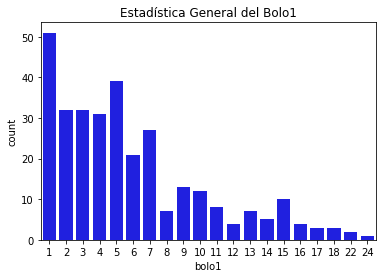

In [10]:
plt.figure(figsize = [6,4])
sns.countplot(data = data, x = 'bolo1', color = 'Blue')
plt.title('Estadística General del Bolo1')
plt.show()

In [11]:
# filter data
miercoles = data.query('day_name=="Wednesday"')
sabados = data.query('day_name=="Saturday"')

In [12]:
def plot_bolos(data, bolo):
    plt.figure(figsize = [6,4])
    sns.countplot(data = data, x = bolo, color = 'Blue')
    plt.title('Estadística del {}'.format(bolo))
    plt.show()

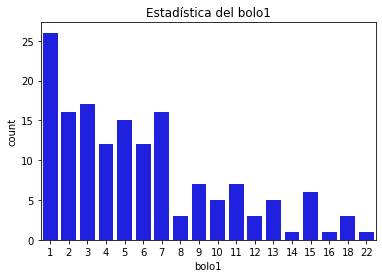

In [13]:
bol1 = plot_bolos(miercoles, 'bolo1')

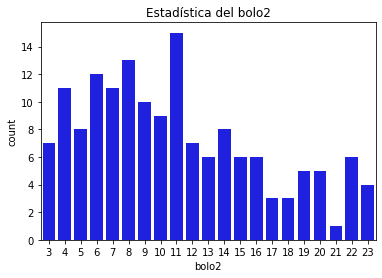

In [14]:
bol2 = plot_bolos(miercoles, 'bolo2')

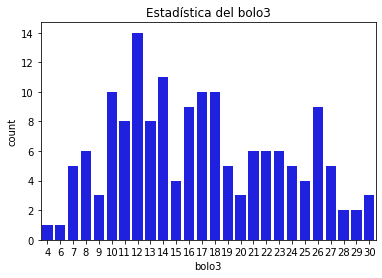

In [15]:
bol3 = plot_bolos(miercoles, 'bolo3')

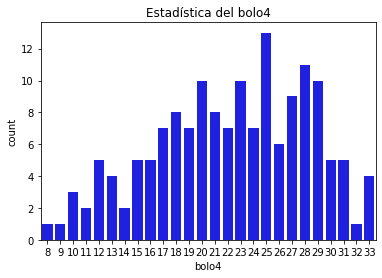

In [16]:
bol4 = plot_bolos(miercoles, 'bolo4')

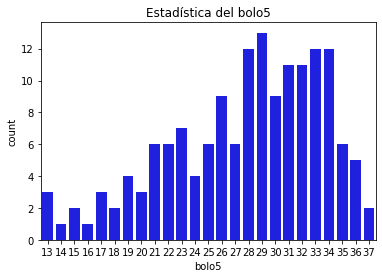

In [17]:
bol5 = plot_bolos(miercoles, 'bolo5')

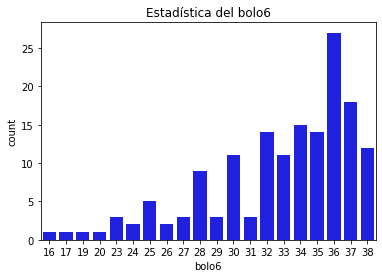

In [18]:
bol6 = plot_bolos(miercoles, 'bolo6')

In [19]:
data.columns

Index(['Fecha', 'bolo1', 'bolo2', 'bolo3', 'bolo4', 'bolo5', 'bolo6',
       'Loto +.1', 'Loto +.2', 'year', 'day_name'],
      dtype='object')

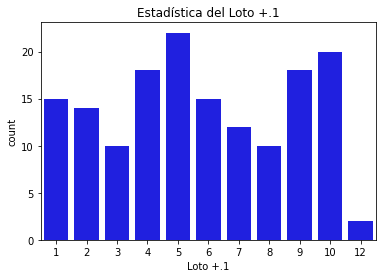

In [20]:
loto1 = plot_bolos(miercoles, 'Loto +.1')

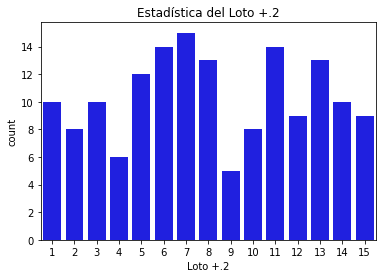

In [21]:
loto2 = plot_bolos(miercoles, 'Loto +.2')

### ESTADISTICA DIA YEAR

In [22]:
miercoles_2022 = miercoles.query('year == 2022')
miercoles_2022.head()

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2,year,day_name
260,2022-01-05,1,11,25,30,31,36,2,1,2022,Wednesday
262,2022-01-12,6,11,13,21,32,33,9,2,2022,Wednesday
264,2022-01-19,22,23,26,29,35,37,6,10,2022,Wednesday
266,2022-01-26,8,10,17,22,25,34,3,6,2022,Wednesday
268,2022-02-02,5,11,12,17,24,32,5,7,2022,Wednesday


In [23]:
sabados_2022 = sabados.query('year == 2022')
sabados_2022.head()

,Fecha,bolo1,bolo2,bolo3,bolo4,bolo5,bolo6,Loto +.1,Loto +.2,year,day_name
261,2022-01-08,4,8,14,21,22,33,2,15,2022,Saturday
263,2022-01-15,1,3,11,12,21,37,9,5,2022,Saturday
265,2022-01-22,4,13,16,17,22,23,5,15,2022,Saturday
267,2022-01-29,4,12,14,15,23,34,7,7,2022,Saturday
269,2022-02-05,3,18,24,27,34,36,6,5,2022,Saturday


#### PLOTING

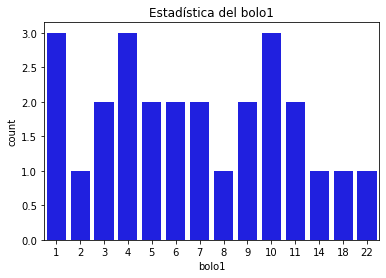

In [24]:
plot_bolos(miercoles_2022, 'bolo1')

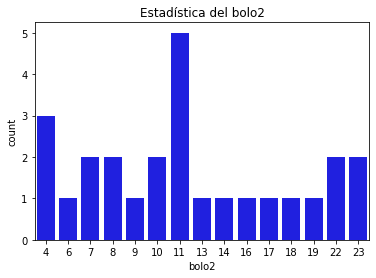

In [25]:
plot_bolos(miercoles_2022, 'bolo2')

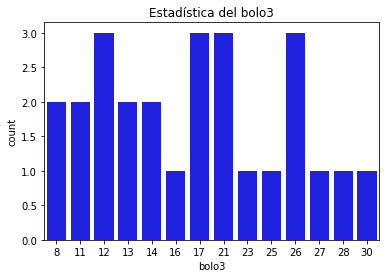

In [26]:
plot_bolos(miercoles_2022, 'bolo3')

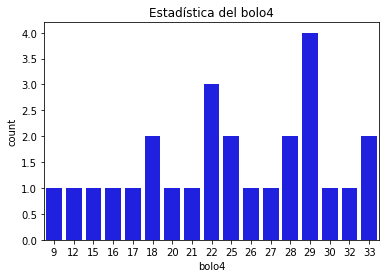

In [27]:
plot_bolos(miercoles_2022, 'bolo4')

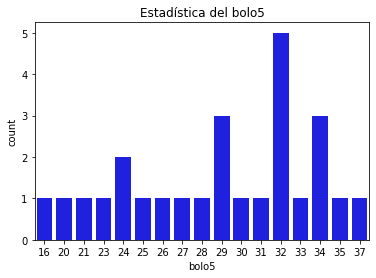

In [28]:
plot_bolos(miercoles_2022, 'bolo5')

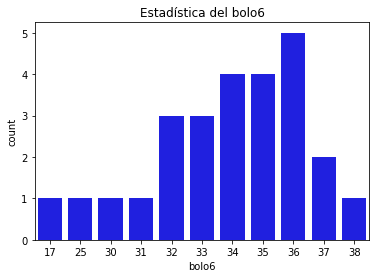

In [29]:
plot_bolos(miercoles_2022, 'bolo6')

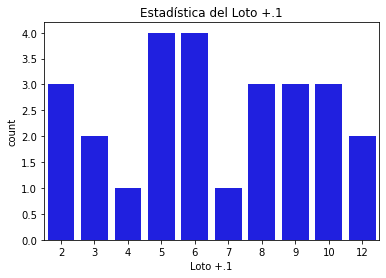

In [30]:
plot_bolos(miercoles_2022, 'Loto +.1')

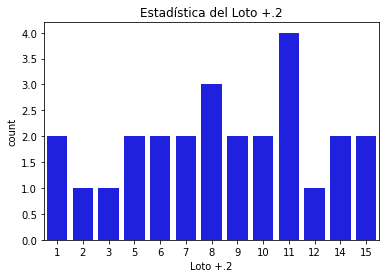

In [31]:
plot_bolos(miercoles_2022, 'Loto +.2')